In [10]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

from sklearn.model_selection import KFold
def kfold(k, predictor, X):
    kf = KFold(n_splits = k, random_state = 0)
    count = 0
    coeff_used = 0 
    for trains, tests in kf.split(X):
        x_train = X.iloc[trains, 1:-1]
        y_train = X.iloc[trains, -1]
        x_test = X.iloc[tests, 1:-1]
        y_test = X.iloc[tests, -1]
        predictor.fit(x_train, y_train)
        predictions = predictor.predict(x_test)
        count += np.sqrt(mean_squared_error(predictions, y_test))
    return count/k

from collections import Counter

In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

# Remove first column to make predictions
X_test = test.iloc[:, 1:]

In [4]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [7]:
for n_estimator in [50, 100, 150, 200, 250, 300]:
    print n_estimator, kfold(10, GradientBoostingRegressor(n_estimators=n_estimator), train)

50 0.02695654472745474
100 0.02691550009536566
150 0.026958150577280165
200 0.026953423906862933
250 0.02704789568363572
300 0.02708265184072778


In [23]:
for max_depth in [1, 2,4,6,8]:
    print max_depth, kfold(max_depth, GradientBoostingRegressor(max_depth = max_depth), train)

2 0.027159124300025404
4 0.027087834207946002
6 0.027236975974814486
8 0.027420647191375807
10

KeyboardInterrupt: 

In [1]:
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4)
clf.fit(X_train, y_train)
print ("Training RMSE: ", scoreRMSE(clf, X_train, y_train))

NameError: name 'GradientBoostingRegressor' is not defined

In [28]:
# Make predictions using linear regression model fitted above
predictions = clf.predict(X_test)

In [ ]:
kfold(10, clf)

In [31]:
# Precise tuning of GBR

from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
    'min_samples_leaf': [5, 15, 25, 35, 45, 55, 65]
}

gbR = GradientBoostingRegressor(n_estimators=80, max_depth=6, max_features='sqrt', subsample=0.8)
gs = GridSearchCV(estimator=gbR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 4 folds for each of 49 candidates, totalling 196 fits
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV]  min_samples_leaf=5, min_samples_split=2, score=0.06489819361928284, total=   0.8s
[CV]  min_samples_leaf=5, min_samples_split=2, score=0.05908813808983959, total=   0.8s
[CV]  min_samples_leaf=5, min_samples_split=2, score=0.06647496959134724, total=   0.8s
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV]  min_samples_leaf=5, min_samples_split=2, score=0.09423728523129671, total=   0.8s
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV]  min_samples_

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.7s


[CV]  min_samples_leaf=5, min_samples_split=14, score=0.051211510885879274, total=   0.9s
[CV]  min_samples_leaf=5, min_samples_split=14, score=0.06353651001431238, total=   0.8s
[CV] min_samples_leaf=15, min_samples_split=2 ........................
[CV] min_samples_leaf=15, min_samples_split=2 ........................
[CV]  min_samples_leaf=5, min_samples_split=14, score=0.08685585684315977, total=   0.9s
[CV]  min_samples_leaf=5, min_samples_split=14, score=0.052296640789551874, total=   0.9s
[CV] min_samples_leaf=15, min_samples_split=2 ........................
[CV] min_samples_leaf=15, min_samples_split=2 ........................
[CV]  min_samples_leaf=15, min_samples_split=2, score=0.06091703231260948, total=   0.8s
[CV] min_samples_leaf=15, min_samples_split=4 ........................
[CV]  min_samples_leaf=15, min_samples_split=2, score=0.058984941088492386, total=   0.9s
[CV] min_samples_leaf=15, min_samples_split=4 ........................
[CV]  min_samples_leaf=15, min_sample

[CV] min_samples_leaf=25, min_samples_split=12 .......................
[CV]  min_samples_leaf=25, min_samples_split=12, score=0.05259485252622631, total=   0.8s
[CV] min_samples_leaf=25, min_samples_split=14 .......................
[CV]  min_samples_leaf=25, min_samples_split=12, score=0.07800426386376569, total=   0.8s
[CV] min_samples_leaf=25, min_samples_split=14 .......................
[CV]  min_samples_leaf=25, min_samples_split=12, score=0.061460123702442464, total=   0.9s
[CV] min_samples_leaf=25, min_samples_split=14 .......................
[CV]  min_samples_leaf=25, min_samples_split=12, score=0.08404789302047855, total=   1.0s
[CV] min_samples_leaf=25, min_samples_split=14 .......................
[CV]  min_samples_leaf=25, min_samples_split=14, score=0.05516111883187835, total=   0.9s
[CV] min_samples_leaf=35, min_samples_split=2 ........................
[CV]  min_samples_leaf=25, min_samples_split=14, score=0.06866031116278648, total=   0.9s
[CV] min_samples_leaf=35, min_sam

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   28.9s


[CV]  min_samples_leaf=45, min_samples_split=6, score=0.05725541752969809, total=   0.8s
[CV] min_samples_leaf=45, min_samples_split=8 ........................
[CV]  min_samples_leaf=45, min_samples_split=6, score=0.06924781451996265, total=   0.8s
[CV] min_samples_leaf=45, min_samples_split=8 ........................
[CV]  min_samples_leaf=45, min_samples_split=6, score=0.07591099636426735, total=   0.8s
[CV] min_samples_leaf=45, min_samples_split=8 ........................
[CV]  min_samples_leaf=45, min_samples_split=6, score=0.08109953535486925, total=   0.8s
[CV] min_samples_leaf=45, min_samples_split=8 ........................
[CV]  min_samples_leaf=45, min_samples_split=8, score=0.04839318792125069, total=   0.7s
[CV] min_samples_leaf=45, min_samples_split=10 .......................
[CV]  min_samples_leaf=45, min_samples_split=8, score=0.07768280812564854, total=   0.7s
[CV] min_samples_leaf=45, min_samples_split=10 .......................
[CV]  min_samples_leaf=45, min_samples_s

[CV] min_samples_leaf=65, min_samples_split=4 ........................
[CV]  min_samples_leaf=65, min_samples_split=4, score=0.06264464497592648, total=   0.8s
[CV] min_samples_leaf=65, min_samples_split=6 ........................
[CV]  min_samples_leaf=65, min_samples_split=4, score=0.06432428517958755, total=   0.8s
[CV] min_samples_leaf=65, min_samples_split=6 ........................
[CV]  min_samples_leaf=65, min_samples_split=4, score=0.07510601343101353, total=   0.8s
[CV]  min_samples_leaf=65, min_samples_split=4, score=0.08954041110466027, total=   0.7s
[CV] min_samples_leaf=65, min_samples_split=6 ........................
[CV] min_samples_leaf=65, min_samples_split=6 ........................
[CV]  min_samples_leaf=65, min_samples_split=6, score=0.055507601715092614, total=   0.7s
[CV] min_samples_leaf=65, min_samples_split=8 ........................
[CV]  min_samples_leaf=65, min_samples_split=6, score=0.06863209125708847, total=   0.6s
[CV] min_samples_leaf=65, min_samples_s

[Parallel(n_jobs=4)]: Done 196 out of 196 | elapsed:   45.0s finished


{'min_samples_leaf': 45, 'min_samples_split': 4}


In [33]:
params = {
    'max_features': [11, 13, 15, 17, 19]
}

gbR = GradientBoostingRegressor(n_estimators=80, max_depth=6, min_samples_split=4, min_samples_leaf=45, subsample=0.8)
gs = GridSearchCV(estimator=gbR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] max_features=11 .................................................
[CV] max_features=11 .................................................
[CV] max_features=11 .................................................
[CV] max_features=11 .................................................
[CV] ....... max_features=11, score=0.05388722334820051, total=   0.6s
[CV] ....... max_features=11, score=0.06117859054834251, total=   0.6s
[CV] ....... max_features=11, score=0.07561895835158172, total=   0.6s
[CV] max_features=13 .................................................
[CV] max_features=13 .................................................
[CV] ....... max_features=11, score=0.08245608460486387, total=   0.6s
[CV] max_features=13 .................................................
[CV] max_features=13 .................................................
[CV] ....... max_features=13, score=0.06150012539134053, total=   0.7s
[CV] max_features

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    4.6s finished


{'max_features': 13}


In [36]:
params = {
    'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
}

gbR = GradientBoostingRegressor(n_estimators=80, max_depth=6, min_samples_split=4, min_samples_leaf=45, max_features=13)
gs = GridSearchCV(estimator=gbR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] subsample=0.6 ...................................................
[CV] subsample=0.6 ...................................................
[CV] subsample=0.6 ...................................................
[CV] subsample=0.6 ...................................................
[CV] ........ subsample=0.6, score=0.061974258748876965, total=   0.7s
[CV] ........ subsample=0.6, score=0.059311594020733605, total=   0.7s
[CV] subsample=0.65 ..................................................
[CV] ......... subsample=0.6, score=0.07215398022295316, total=   0.7s
[CV] subsample=0.65 ..................................................
[CV] subsample=0.65 ..................................................
[CV] ......... subsample=0.6, score=0.07236006463706679, total=   0.7s
[CV] subsample=0.65 ..................................................
[CV] ......... subsample=0.65, score=0.0565595148553697, total=   0.6s
[CV] ........ sub

[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    5.1s finished


{'subsample': 0.8}


In [43]:
params = {
    'n_estimators': [300, 400, 500, 600]
}

gbR = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_split=4, min_samples_leaf=45, subsample=0.8)
gs = GridSearchCV(estimator=gbR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] n_estimators=300 ................................................
[CV] n_estimators=300 ................................................
[CV] n_estimators=300 ................................................
[CV] n_estimators=300 ................................................
[CV] ...... n_estimators=300, score=0.06801625668927713, total=  24.4s
[CV] n_estimators=400 ................................................
[CV] ...... n_estimators=300, score=0.09040542307890742, total=  24.8s
[CV] n_estimators=400 ................................................
[CV] ...... n_estimators=300, score=0.07791422879202248, total=  24.9s
[CV] n_estimators=400 ................................................
[CV] ...... n_estimators=300, score=0.06493616105500932, total=  24.9s
[CV] n_estimators=400 ................................................
[CV] ....... n_estimators=400, score=0.0668936697487349, total=  30.6s
[CV] n_estimators

[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:  2.3min finished


{'n_estimators': 400}


In [51]:
params = {
    'max_depth': [26, 30, 35],
    'min_samples_split': [8, 12, 16]
}

gbR = GradientBoostingRegressor(learning_rate=0.01, n_estimators=400, min_samples_leaf=45, max_features=13, subsample=0.8)
gs = GridSearchCV(estimator=gbR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] max_depth=26, min_samples_split=8 ...............................
[CV] max_depth=26, min_samples_split=8 ...............................
[CV] max_depth=26, min_samples_split=8 ...............................
[CV] max_depth=26, min_samples_split=8 ...............................
[CV]  max_depth=26, min_samples_split=8, score=0.07161568274125973, total=   4.9s
[CV]  max_depth=26, min_samples_split=8, score=0.09454373768274471, total=   4.7s
[CV]  max_depth=26, min_samples_split=8, score=0.07932834165418556, total=   4.9s
[CV] max_depth=26, min_samples_split=12 ..............................
[CV]  max_depth=26, min_samples_split=8, score=0.08091927916876851, total=   4.8s
[CV] max_depth=26, min_samples_split=12 ..............................
[CV] max_depth=26, min_samples_split=12 ..............................
[CV] max_depth=26, min_samples_split=12 ..............................
[CV]  max_depth=26, min_samples_split=12, sc

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   29.5s


[CV]  max_depth=35, min_samples_split=8, score=0.07891738445413632, total=   5.7s
[CV]  max_depth=35, min_samples_split=8, score=0.06720723392651418, total=   5.7s
[CV] max_depth=35, min_samples_split=12 ..............................
[CV] max_depth=35, min_samples_split=12 ..............................
[CV]  max_depth=35, min_samples_split=8, score=0.08561673424594596, total=   5.7s
[CV] max_depth=35, min_samples_split=12 ..............................
[CV]  max_depth=35, min_samples_split=8, score=0.09124292814537938, total=   5.7s
[CV] max_depth=35, min_samples_split=12 ..............................
[CV]  max_depth=35, min_samples_split=12, score=0.07000843636163923, total=   5.5s
[CV]  max_depth=35, min_samples_split=12, score=0.0824485484791696, total=   5.5s
[CV] max_depth=35, min_samples_split=16 ..............................
[CV] max_depth=35, min_samples_split=16 ..............................
[CV]  max_depth=35, min_samples_split=12, score=0.0765703266648069, total=   5.5s

[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:   46.9s finished


{'max_depth': 26, 'min_samples_split': 8}


In [53]:
params = {
    'min_samples_split': [4, 12, 20],
    'min_samples_leaf': [5, 10, 15]
}

gbR = GradientBoostingRegressor(learning_rate=0.01, n_estimators=400, max_depth=26, min_samples_split=4, min_samples_leaf=10, max_features=13, subsample=0.8)
gs = GridSearchCV(estimator=gbR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV]  min_samples_leaf=5, min_samples_split=4, score=0.08495548281614862, total=  17.3s
[CV]  min_samples_leaf=5, min_samples_split=4, score=0.08190060757991124, total=  17.3s
[CV] min_samples_leaf=5, min_samples_split=12 ........................
[CV] min_samples_leaf=5, min_samples_split=12 ........................
[CV]  min_samples_leaf=5, min_samples_split=4, score=0.0764281448220564, total=  17.5s
[CV] min_samples_leaf=5, min_samples_split=12 ........................
[CV]  min_samples_leaf=5, min_samples_split=4, score=0.11001763837874523, total=  17.4s
[CV] min_samples_leaf=5, min_samples_split=12 ........................
[CV]  min_samples_lea

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.4min


[CV]  min_samples_leaf=15, min_samples_split=4, score=0.07166367094820758, total=   8.9s
[CV] min_samples_leaf=15, min_samples_split=12 .......................
[CV]  min_samples_leaf=15, min_samples_split=4, score=0.0859936090762018, total=   8.9s
[CV] min_samples_leaf=15, min_samples_split=12 .......................
[CV]  min_samples_leaf=15, min_samples_split=4, score=0.0828794990740086, total=   9.0s
[CV] min_samples_leaf=15, min_samples_split=12 .......................
[CV]  min_samples_leaf=15, min_samples_split=4, score=0.10783823176390639, total=   8.9s
[CV] min_samples_leaf=15, min_samples_split=12 .......................
[CV]  min_samples_leaf=15, min_samples_split=12, score=0.08840620873323812, total=   8.8s
[CV]  min_samples_leaf=15, min_samples_split=12, score=0.07436141535561347, total=   8.9s
[CV] min_samples_leaf=15, min_samples_split=20 .......................
[CV] min_samples_leaf=15, min_samples_split=20 .......................
[CV]  min_samples_leaf=15, min_samples_s

[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:  1.8min finished


{'min_samples_leaf': 10, 'min_samples_split': 4}


In [55]:
params = {
    'max_features': [10, 13, 16],
    'subsample': [0.7, 0.8, 0.85]
}

gbR = GradientBoostingRegressor(learning_rate=0.01, n_estimators=400, max_depth=26, min_samples_split=4, min_samples_leaf=10, max_features=13, subsample=0.8)
gs = GridSearchCV(estimator=gbR, param_grid=params, cv=4, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] max_features=10, subsample=0.7 ..................................
[CV] max_features=10, subsample=0.7 ..................................
[CV] max_features=10, subsample=0.7 ..................................
[CV] max_features=10, subsample=0.7 ..................................
[CV]  max_features=10, subsample=0.7, score=0.07609571069255983, total=   9.3s
[CV] max_features=10, subsample=0.8 ..................................
[CV]  max_features=10, subsample=0.7, score=0.10752313526305612, total=   9.3s
[CV] max_features=10, subsample=0.8 ..................................
[CV]  max_features=10, subsample=0.7, score=0.08725070165731752, total=   9.6s
[CV]  max_features=10, subsample=0.7, score=0.0885290888346495, total=   9.6s
[CV] max_features=10, subsample=0.8 ..................................
[CV] max_features=10, subsample=0.8 ..................................
[CV]  max_features=10, subsample=0.8, score=0.08814876816

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.1min


[CV]  max_features=16, subsample=0.7, score=0.08267466590903638, total=  12.7s
[CV]  max_features=16, subsample=0.7, score=0.07212711311936348, total=  12.8s
[CV] max_features=16, subsample=0.8 ..................................
[CV] max_features=16, subsample=0.8 ..................................
[CV]  max_features=16, subsample=0.7, score=0.0851857647915184, total=  13.0s
[CV] max_features=16, subsample=0.8 ..................................
[CV]  max_features=16, subsample=0.7, score=0.10474721127572639, total=  13.0s
[CV] max_features=16, subsample=0.8 ..................................
[CV]  max_features=16, subsample=0.8, score=0.08062072931758968, total=  15.5s
[CV] max_features=16, subsample=0.85 .................................
[CV]  max_features=16, subsample=0.8, score=0.07681924412623065, total=  15.7s
[CV] max_features=16, subsample=0.85 .................................
[CV]  max_features=16, subsample=0.8, score=0.08882599604319152, total=  15.6s
[CV] max_features=16, 

[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:  1.8min finished


{'max_features': 10, 'subsample': 0.8}


In [58]:
kfold(10, gs.best_estimator_, train)

0.026523640480080095

In [59]:
predictions = gs.best_estimator_.predict(test.iloc[:, 1:])

In [60]:
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.939600
1,2,0.911550
2,3,0.913394
3,4,0.928524
4,5,0.933152


In [61]:
sample_submission.to_csv("tunedgbr.csv", index=False)

In [6]:
# More GBR vs. n_est dependence

for n_est in [50, 100, 150, 200, 300, 400, 500, 750, 1000]:
    print("GBR n =", n_est, ":", kfold(5, GradientBoostingRegressor(learning_rate=0.01, n_estimators=n_est, subsample=0.8), train))

GBR n = 50 : 0.027561738921751688
GBR n = 100 : 0.027338669275692208
GBR n = 150 : 0.027216812376947053
GBR n = 200 : 0.027126876514900013
GBR n = 300 : 0.027075779747246675
GBR n = 400 : 0.027034925018188376
GBR n = 500 : 0.027022070882138448
GBR n = 750 : 0.027021008296059655
GBR n = 1000 : 0.02701510621662856


In [7]:
for n_est in [75, 125, 175, 225, 250, 275, 325]:
    print("GBR n =", n_est, ":", kfold(10, GradientBoostingRegressor(learning_rate=0.01, n_estimators=n_est, subsample=0.8), train))

GBR n = 75 : 0.02744019889757099
GBR n = 125 : 0.02725501191988109
GBR n = 175 : 0.027150584692202058
GBR n = 225 : 0.027083381542015422
GBR n = 250 : 0.027074260365592157
GBR n = 275 : 0.02704308172636794
GBR n = 325 : 0.02701547761367678


In [9]:
print("GBR n =", n_est, ":", kfold(10, GradientBoostingRegressor(n_estimators=325), train))

GBR n = 325 : 0.027102744072368894


In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_split': [2, 4, 6, 8, 10, 12],
    'min_samples_leaf': [5, 15, 25, 35, 45, 55, 65]
}

gbR = GradientBoostingRegressor(n_estimators=80, max_depth=6, max_features='sqrt', subsample=0.8)
gs = GridSearchCV(estimator=gbR, scoring='neg_mean_squared_error', param_grid=params, cv=5, n_jobs=4, verbose=3)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV]  min_samples_leaf=5, min_samples_split=2, score=-0.0007479505534101511, total=   1.0s
[CV] min_samples_leaf=5, min_samples_split=2 .........................
[CV]  min_samples_leaf=5, min_samples_split=2, score=-0.0008261113765467076, total=   0.9s
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV]  min_samples_leaf=5, min_samples_split=2, score=-0.000727492091152029, total=   1.0s
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV]  min_samples_leaf=5, min_samples_split=2, score=-0.0006634284785224196, total=   1.0s
[CV] min_samples_leaf=5, min_samples_split=4 .........................
[CV]  m

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    6.1s


[CV]  min_samples_leaf=5, min_samples_split=10, score=-0.0007148257736265161, total=   0.7s
[CV] min_samples_leaf=5, min_samples_split=12 ........................
[CV]  min_samples_leaf=5, min_samples_split=12, score=-0.0007379108752586605, total=   0.7s
[CV] min_samples_leaf=5, min_samples_split=12 ........................
[CV]  min_samples_leaf=5, min_samples_split=12, score=-0.0006642034545162755, total=   0.7s
[CV]  min_samples_leaf=5, min_samples_split=12, score=-0.0008293074822211392, total=   0.7s
[CV] min_samples_leaf=15, min_samples_split=2 ........................
[CV] min_samples_leaf=15, min_samples_split=2 ........................
[CV]  min_samples_leaf=5, min_samples_split=12, score=-0.0007228942889339665, total=   0.9s
[CV] min_samples_leaf=15, min_samples_split=2 ........................
[CV]  min_samples_leaf=5, min_samples_split=12, score=-0.0007066699454001752, total=   1.1s
[CV] min_samples_leaf=15, min_samples_split=2 ........................
[CV]  min_samples_leaf

[CV] min_samples_leaf=25, min_samples_split=8 ........................
[CV]  min_samples_leaf=25, min_samples_split=8, score=-0.0007453316831861865, total=   0.7s
[CV] min_samples_leaf=25, min_samples_split=8 ........................
[CV]  min_samples_leaf=25, min_samples_split=8, score=-0.0008094485596914197, total=   0.7s
[CV] min_samples_leaf=25, min_samples_split=10 .......................
[CV]  min_samples_leaf=25, min_samples_split=8, score=-0.000654704009817653, total=   0.7s
[CV] min_samples_leaf=25, min_samples_split=10 .......................
[CV]  min_samples_leaf=25, min_samples_split=8, score=-0.0007146428804001686, total=   0.7s
[CV] min_samples_leaf=25, min_samples_split=10 .......................
[CV]  min_samples_leaf=25, min_samples_split=8, score=-0.0007191035729137391, total=   0.7s
[CV] min_samples_leaf=25, min_samples_split=10 .......................
[CV]  min_samples_leaf=25, min_samples_split=10, score=-0.0007442871928271495, total=   0.7s
[CV] min_samples_leaf=

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   26.7s


[CV]  min_samples_leaf=45, min_samples_split=2, score=-0.000746010170717288, total=   0.7s
[CV] min_samples_leaf=45, min_samples_split=2 ........................
[CV]  min_samples_leaf=45, min_samples_split=2, score=-0.0008158776629583212, total=   0.7s
[CV] min_samples_leaf=45, min_samples_split=4 ........................
[CV]  min_samples_leaf=45, min_samples_split=2, score=-0.0006617096620616632, total=   0.7s
[CV] min_samples_leaf=45, min_samples_split=4 ........................
[CV]  min_samples_leaf=45, min_samples_split=2, score=-0.0007009928231141184, total=   0.7s
[CV] min_samples_leaf=45, min_samples_split=4 ........................
[CV]  min_samples_leaf=45, min_samples_split=2, score=-0.0007069938883432268, total=   0.7s
[CV] min_samples_leaf=45, min_samples_split=4 ........................
[CV]  min_samples_leaf=45, min_samples_split=4, score=-0.0007398170345894471, total=   0.7s
[CV] min_samples_leaf=45, min_samples_split=4 ........................
[CV]  min_samples_leaf=

[CV] min_samples_leaf=55, min_samples_split=10 .......................
[CV]  min_samples_leaf=55, min_samples_split=10, score=-0.0008118246136211422, total=   0.7s
[CV] min_samples_leaf=55, min_samples_split=12 .......................
[CV]  min_samples_leaf=55, min_samples_split=10, score=-0.0006489321886641623, total=   0.7s
[CV] min_samples_leaf=55, min_samples_split=12 .......................
[CV]  min_samples_leaf=55, min_samples_split=10, score=-0.0007014571419587743, total=   0.6s
[CV] min_samples_leaf=55, min_samples_split=12 .......................
[CV]  min_samples_leaf=55, min_samples_split=10, score=-0.000711510242639349, total=   0.7s
[CV] min_samples_leaf=55, min_samples_split=12 .......................
[CV]  min_samples_leaf=55, min_samples_split=12, score=-0.0007462831359646827, total=   0.6s
[CV] min_samples_leaf=55, min_samples_split=12 .......................
[CV]  min_samples_leaf=55, min_samples_split=12, score=-0.0008136952433080641, total=   0.6s
[CV] min_samples_

[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:   42.9s finished


{'min_samples_leaf': 35, 'min_samples_split': 4}


In [16]:
from math import *

def cv_rmse(GS, i):
    running = sqrt(-(GS.cv_results_['split0_test_score'][i]))
    running += sqrt(-(GS.cv_results_['split1_test_score'][i]))
    running += sqrt(-(GS.cv_results_['split2_test_score'][i]))
    running += sqrt(-(GS.cv_results_['split3_test_score'][i]))
    running += sqrt(-(GS.cv_results_['split4_test_score'][i]))
    return running/5*10000 - 268

resultss = np.array([gs.cv_results_['param_min_samples_split'][i] for i in range(len(gs.cv_results_['params']))])
resultsl = np.array([gs.cv_results_['param_min_samples_leaf'][i] for i in range(len(gs.cv_results_['params']))])
resultscv = np.array([cv_rmse(gs, i) for i in range(len(gs.cv_results_['split0_test_score']))])

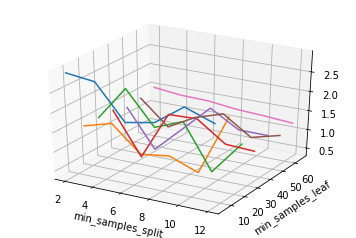

In [57]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')
for i in range(7):
    ax.plot(resultss[i*6 :(i + 1)*6], resultsl[i*6:(i + 1)*6], resultscv[(i*6):(i + 1)*6])
plt.xlabel('min_samples_split')
plt.ylabel('min_samples_leaf')
plt.savefig('gradgrid.png')

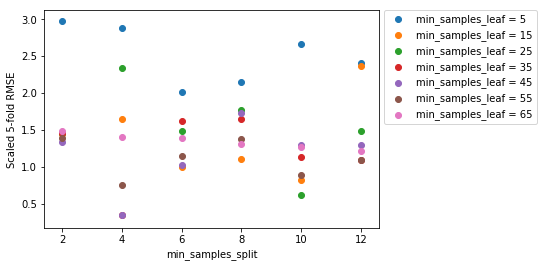

In [64]:
for i in range(7):
    plt.scatter(resultss[i*6 :(i + 1)*6], resultscv[(i*6):(i + 1)*6], label=("min_samples_leaf = " + str(resultsl[i*6])))
plt.legend(bbox_to_anchor=(0.9, 0.9), bbox_transform=plt.gcf().transFigure)
plt.xlabel('min_samples_split')
plt.ylabel('Scaled 5-fold RMSE')
plt.savefig('gradgrid2.png')